In [1]:
import pandas
import sklearn
import my_pipelines
import kNN
import logistic
import SVM

## Car Data: Classification with k-Nearest Neighbors model

### Getting, encoding, splitting data

In [2]:
X, y, encoders = my_pipelines.get_data("car.data")
X_train, X_test, X_val, y_train, y_test, y_val = my_pipelines.split(X, y)

### Hyperparemeter testing... testing k values from 1-10

In [3]:
max_k = 10
scores = []
for k in range(1, max_k+1):
    model = kNN.fit(X_train, y_train.values.ravel(), k)
    scores.append(kNN.score(model, X_val, y_val.values.ravel()))

### Plotting scores to visualize each k's success rate

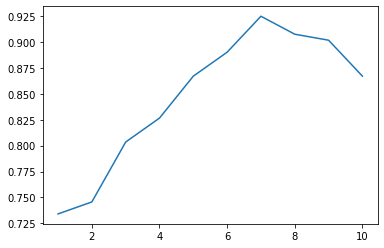

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1, max_k+1), scores)

In [5]:
k=7
model = kNN.fit(X_train, y_train.values.ravel(), k)
print(kNN.score(model, X_test, y_test.values.ravel()))

0.9595375722543352


### k = 7 seems to be the most effective k for the kNN classifier model with a 95% accuracy score. (varries with each run due to data shuffle in split)

## Car Data: Classification with logistic regression

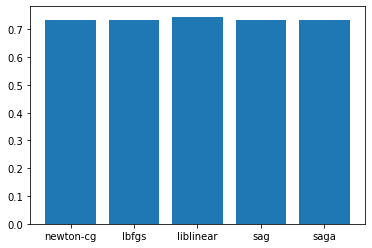

In [11]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for solver in solvers:
    model = logistic.fit(X_train, y_train.values.ravel(), solver)
    scores.append(logistic.score(model, X_val, y_val.values.ravel()))
    
import matplotlib.pyplot as plt
plot = plt.bar(solvers, scores)
plt.show()

### The logistic regression has much less success than kNN

In [10]:
print(scores)

[0.7341040462427746, 0.7341040462427746, 0.7456647398843931, 0.7341040462427746, 0.7341040462427746]


### Using 'liblinear' as the solver seems to have the most success (~75%)

In [4]:
model = SVM.fit(X_train, y_train.values.ravel())

In [5]:
SVM.score(model, X_val, y_val.values.ravel())

0.9248554913294798